# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [11]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale

#Libraries I added
from skimage import morphology
from skimage.morphology import disk
from skimage import filters
from skimage import measure


Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

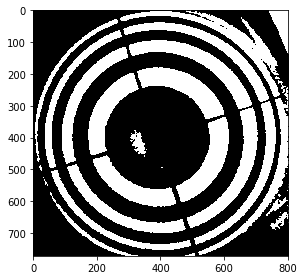

Radius of disk


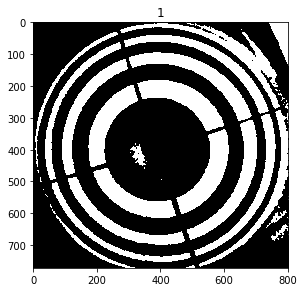

Radius of disk


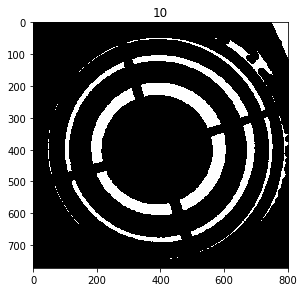

Radius of disk


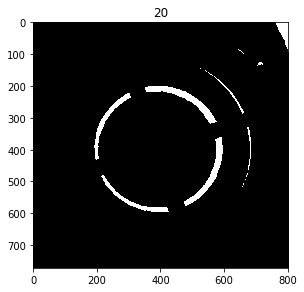

In [2]:
contours=io.imread('./images/FindingContours.png')
io.imshow(contours)
plt.show()
radius_list=[1,10,20]
for i in radius_list:
    print ('Radius of disk')
    io.imshow(morphology.erosion(contours, disk(i)))
    plt.title(i)
    plt.show()

** Q.1.2 Dilation **

Radius of disk


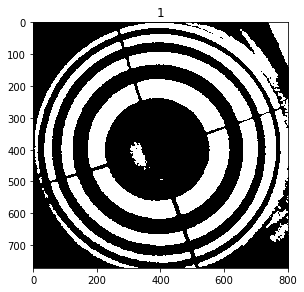

Radius of disk


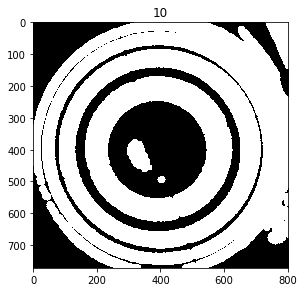

Radius of disk


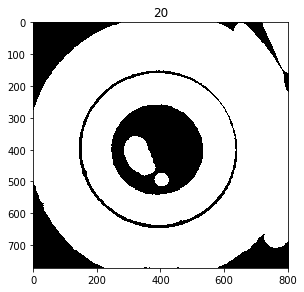

In [3]:
for i in radius_list:
    print ('Radius of disk')
    io.imshow(morphology.dilation(contours, disk(i)))
    plt.title(i)
    plt.show()
  

** Q.1.3 Opening **

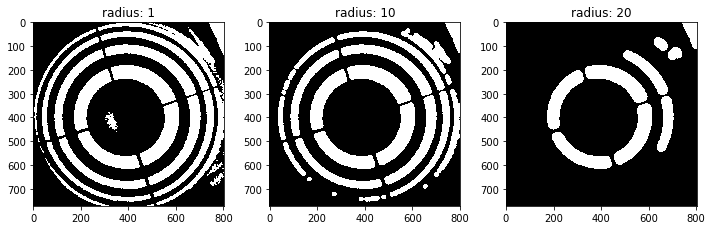

In [4]:
fig = plt.figure(figsize = (10, 10))
for idx , i in enumerate(radius_list):
    plt.subplot(1, 3, idx+1)
    io.imshow(morphology.opening(contours, disk(i)))
    plt.title('radius: ' + str(i))
    
plt.show()

** Q.1.4 Closing**

Radius of disk


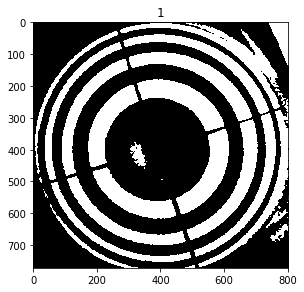

Radius of disk


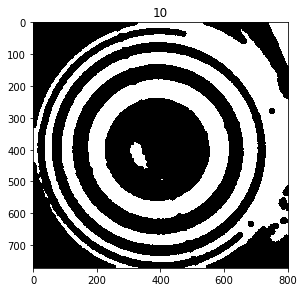

Radius of disk


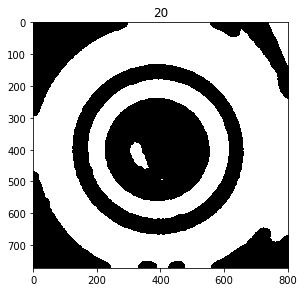

In [5]:
for i in radius_list:
    print ('Radius of disk')
    io.imshow(morphology.closing(contours, disk(i)))
    plt.title(i)
    plt.show()

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

 Erosion shrinks bright regions and enlarges dark regions.
 Dilation enlarges bright regions and shrinks dark regions.
 The morphological opening on an image is defined as an erosion followed by a dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks. This tends to “open” up (dark) gaps between (bright) features.
 The morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks. This tends to “close” up (dark) gaps between (bright) features.

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

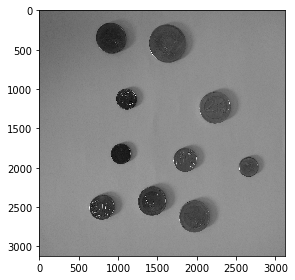

In [6]:
file='./images/coins.jpg'
coins_im=io.imread(file,dtype=np.ubyte, as_grey=True)

io.imshow(coins_im)
plt.show()

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

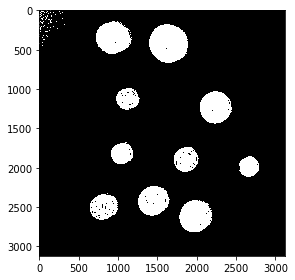

In [17]:
thresh = filters.threshold_otsu(coins_im)
new_coins=coins_im<=thresh
io.imshow(new_coins)
plt.show()

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

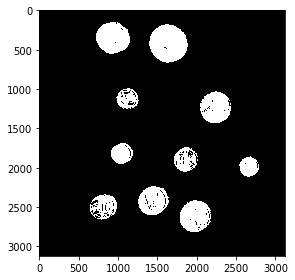

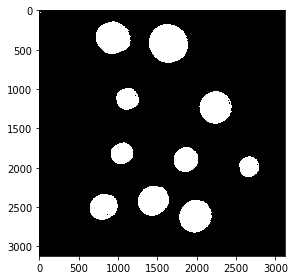

In [28]:
erosion_coin=morphology.erosion(new_coins, disk(3))
io.imshow(dilation_coin)
plt.show()
coin_clean=morphology.dilation(erosion_coin, disk(5))
io.imshow(coin_clean)
plt.show()

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


Number of regions: 14
<skimage.measure._regionprops._RegionProperties object at 0x1c16254a20> this region has a radius of 6 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c162549e8> this region has a radius of 8 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254940> this region has a radius of 7 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254ac8> this region has a radius of 213 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254b00> this region has a radius of 247 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254b38> this region has a radius of 142 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254b70> this region has a radius of 205 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254ba8> this region has a radius of 140 pixels
<skimage.measure._regionprops._RegionProperties object at 0x1c16254be0> this region has a radius

Text(0.5,1,'Label image')

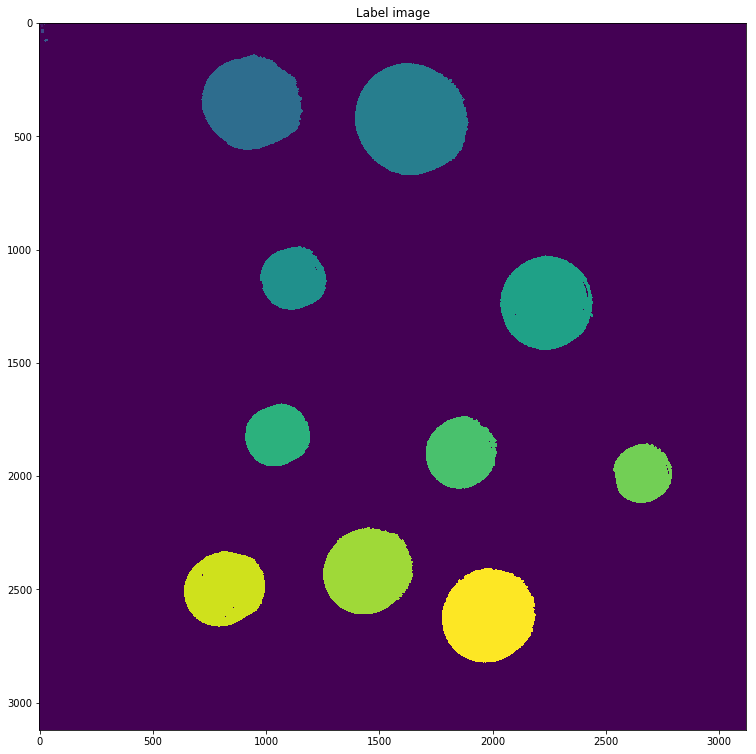

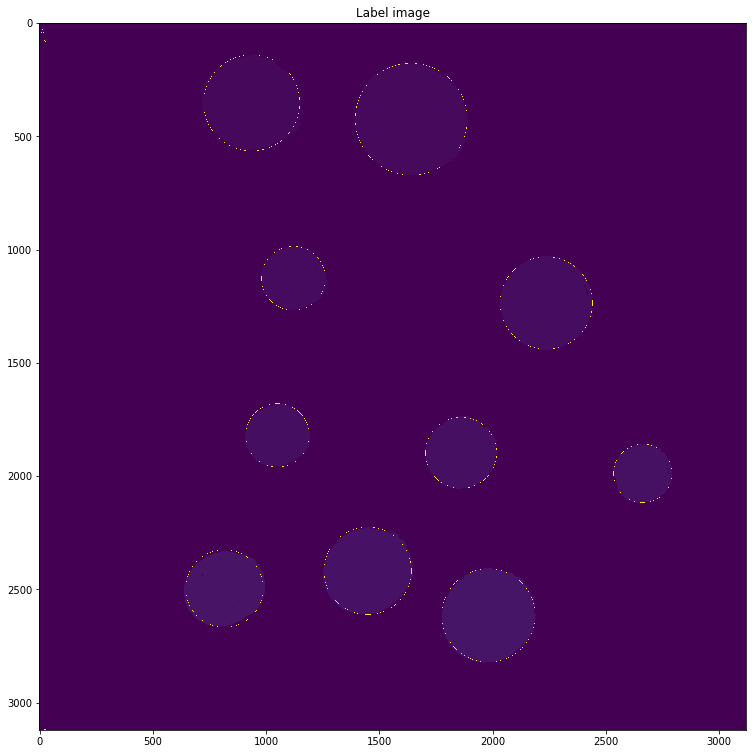

In [29]:
from skimage import draw
coinslabel, nblabel = measure.label(coin_clean, return_num=True)
plt.figure(figsize = (2^15,2^15))
plt.imshow(coinslabel)
plt.title('Label image')

print('Number of regions: {}'.format(nblabel))
regions = measure.regionprops(coinslabel, cache=True)
for idx, region in enumerate(regions):
    if idx ==0:
        continue
    rad = region.equivalent_diameter/2.0
    coord = region.centroid
    print(region,'this region has a radius of {:.0f} pixels'.format(rad))
    circle = draw.circle_perimeter(int(coord[0]),int(coord[1]), int(rad), method='bresenham', shape=None) *255
    coinslabel[circle[0],circle[1]]=255
    
plt.figure(figsize = (2^15,2^15))
plt.imshow(coinslabel)
plt.title('Label image')

### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

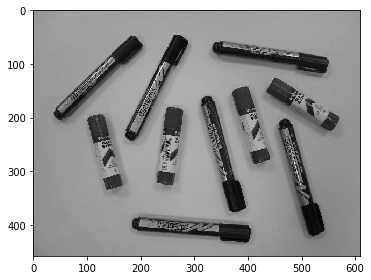

In [31]:
image_marker='./images/objets4.jpg'
marker_im=io.imread(image_marker,dtype=np.ubyte, as_grey=True)

io.imshow(marker_im)
plt.show()

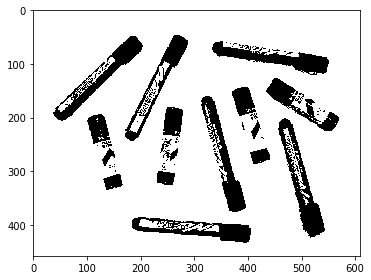

In [38]:
thresh_marker = filters.threshold_otsu(marker_im)
new_marker=marker_im>=thresh_marker
io.imshow(new_marker)
plt.show()

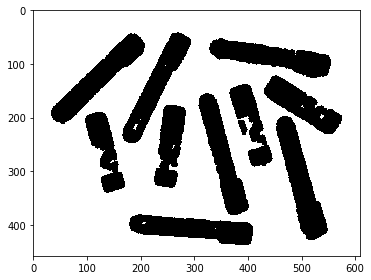

In [74]:
erosion_marker=morphology.erosion(new_marker, disk(5))
io.imshow(erosion_marker)
plt.show()
marker_clean=erosion_marker

In [75]:
Marker_Labels= measure.label(marker_clean, background=1)
Region_Marker= measure.regionprops(Marker_Labels)
print("Total objects {}".format(len(Region_Marker)))


Total objects 10
